In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
import pandas as pd

In [2]:
df=pd.read_csv('../../data/house-prices/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.size

118260

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

### DF fill NA for numerical columns

In [7]:
num_cols = df.select_dtypes(include='number').columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median())

In [8]:
str_col=df.select_dtypes(exclude='number').columns
df[str_col]=df[str_col].fillna(df[str_col].mode().iloc[0])

In [77]:
df.size

118260

In [9]:
pd.set_option('display.max_rows', None)
df.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr

In [10]:
label_encoded_col=['MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
                   'Neighborhood','Condition1','Condition2','BldgType',
                   'HouseStyle','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                   'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure',
                   'BsmtFinType1','BsmtFinType2','Heating','HeatingQC','CentralAir','Electrical','KitchenQual',
                   'Functional','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond',
                   'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']

label_encoder=LabelEncoder()
for col in label_encoded_col:
    df[col]=label_encoder.fit_transform(df[col])

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,0,3,3,0,...,0,2,2,2,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,0,3,3,0,...,0,2,2,2,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,0,3,0,...,0,2,2,2,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,0,3,0,...,0,2,2,2,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,0,3,0,...,0,2,2,2,0,12,2008,8,4,250000


In [12]:
df_id=df['Id']
price=df['SalePrice']
df=df.drop(['Id'],axis=1)

In [13]:
numeric_columns = df.columns.difference(label_encoded_col)
numeric_columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallQual', 'PoolArea', 'SalePrice',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [14]:
stdScaler=StandardScaler()

In [15]:
for col in numeric_columns:
    df[col]=stdScaler.fit_transform(df[[col]])

In [85]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,3,-0.220875,-0.207142,1,0,3,3,0,4,...,-0.068692,2,2,2,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-0.872563,3,0.460320,-0.091886,1,0,3,3,0,2,...,-0.068692,2,2,2,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,0.073375,3,-0.084636,0.073480,1,0,0,3,0,4,...,-0.068692,2,2,2,-0.087688,0.990891,0.138777,8,4,0.536154
3,0.309859,3,-0.447940,-0.096897,1,0,0,3,0,0,...,-0.068692,2,2,2,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,0.073375,3,0.641972,0.375148,1,0,0,3,0,2,...,-0.068692,2,2,2,-0.087688,2.100892,0.138777,8,4,0.869843


In [16]:
df.size

116800

### FEature selection
VarianceThreshold: get_feature_names_out() filters out the features which has greater than threshold variance
get_feature_names_out() returns only those feature (column) names whose variance is strictly greater than the threshold.
Generally used to filter out the constant features

In [33]:
from sklearn.feature_selection import VarianceThreshold
var_thres=VarianceThreshold(threshold=0.1)
var_thres.fit(df)
filtered_features=var_thres.get_feature_names_out()
print(filtered_features)

['MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'LotShape' 'LandContour'
 'LotConfig' 'Neighborhood' 'Condition1' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrArea' 'ExterQual'
 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'HeatingQC' 'Electrical' '1stFlrSF' '2ndFlrSF'
 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath' 'FullBath'
 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual' 'TotRmsAbvGrd'
 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType' 'GarageYrBlt'
 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual' 'GarageCond'
 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch' '3SsnPorch'
 'ScreenPorch' 'PoolArea' 'Fence' 'MiscVal' 'MoSold' 'YrSold' 'SaleType'
 'SaleCondition' 'SalePrice']


In [30]:
print(var_thres.get_support())

[ True  True  True  True False False  True  True False  True False  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True]


###  Dropping features based on near constant variance 

In [36]:
df_filtered = df[filtered_features]
df_filtered.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,Condition1,BldgType,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,3,-0.220875,-0.207142,3,3,4,5,2,0,...,-0.116339,-0.270208,-0.068692,2,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-0.872563,3,0.460320,-0.091886,3,3,2,24,1,0,...,-0.116339,-0.270208,-0.068692,2,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,0.073375,3,-0.084636,0.073480,0,3,4,5,2,0,...,-0.116339,-0.270208,-0.068692,2,-0.087688,0.990891,0.138777,8,4,0.536154
3,0.309859,3,-0.447940,-0.096897,0,3,0,6,2,0,...,-0.116339,-0.270208,-0.068692,2,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,0.073375,3,0.641972,0.375148,0,3,2,15,2,0,...,-0.116339,-0.270208,-0.068692,2,-0.087688,2.100892,0.138777,8,4,0.869843


### Dropping feature on pearson Correlation

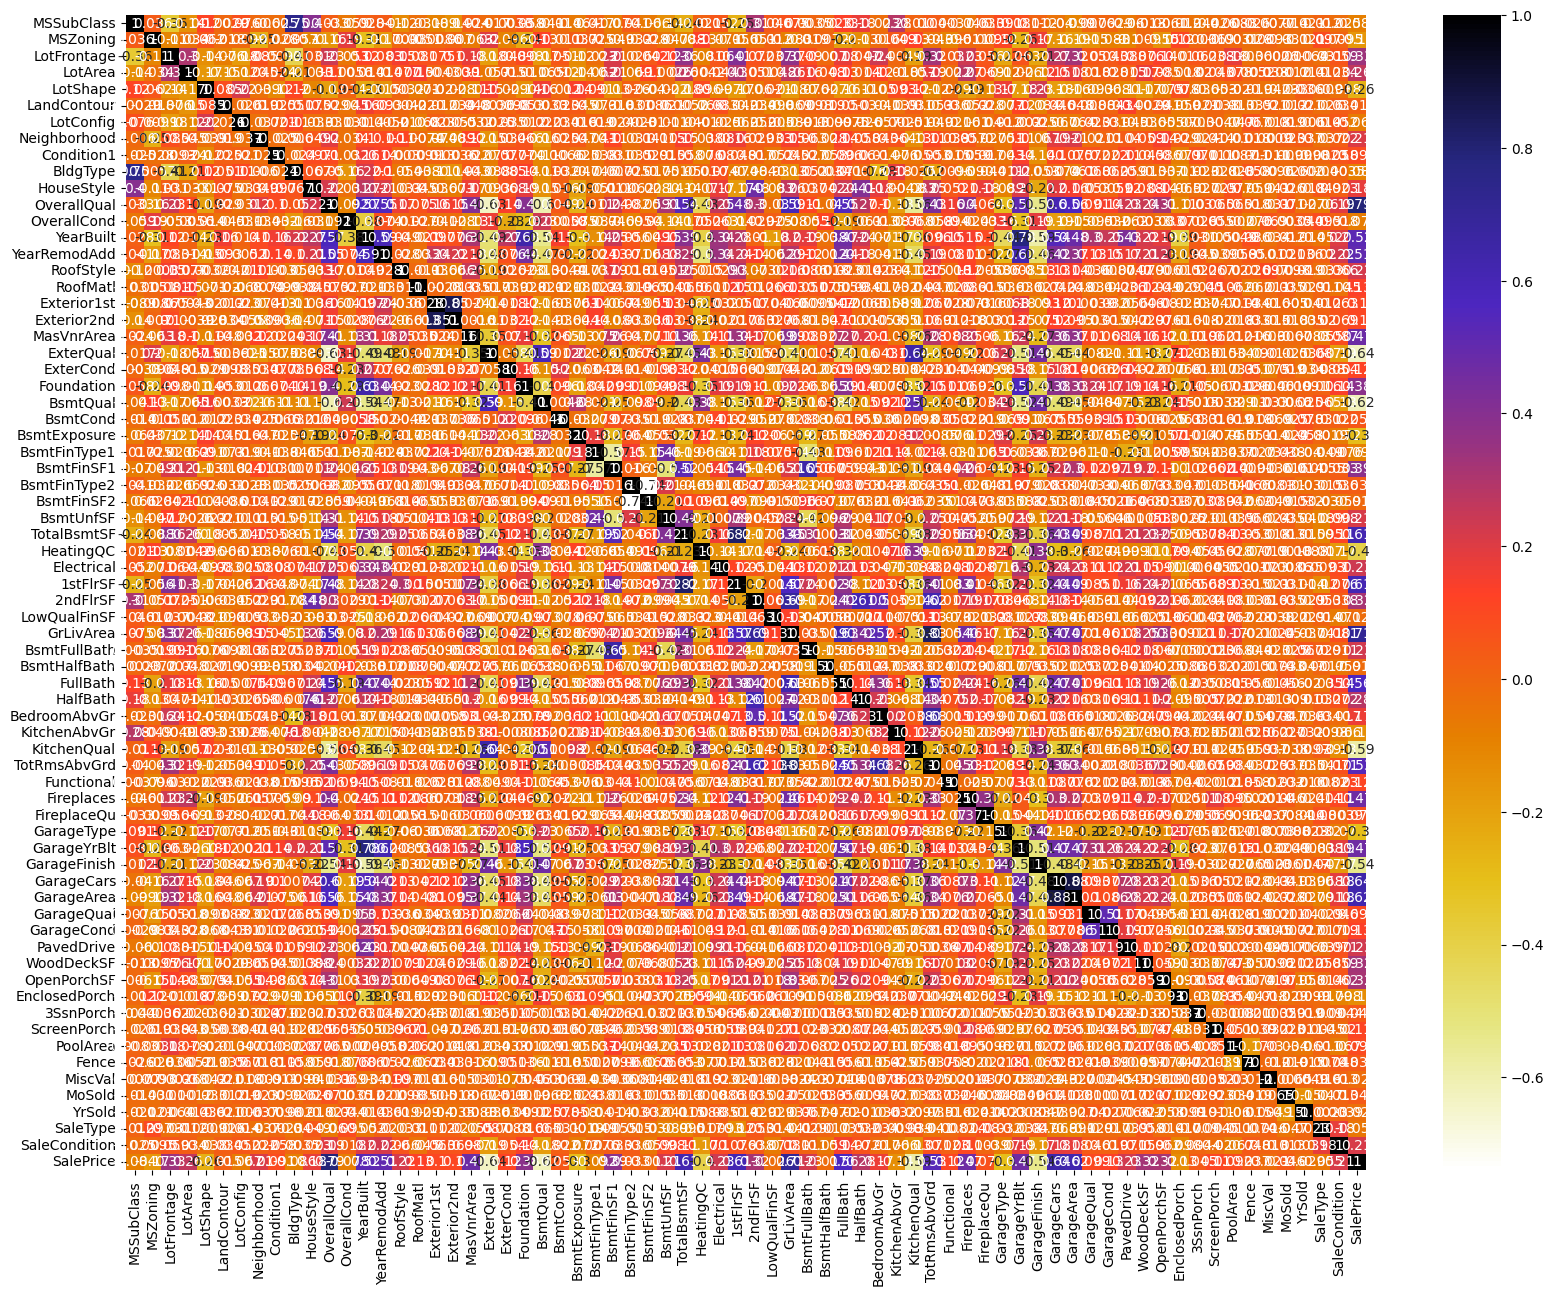

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,15))
corr=df_filtered.corr()
sns.heatmap(corr,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

In [43]:

target='SalePrice'
X=df_filtered.drop([target],axis=1)
y=df_filtered[target]

In [44]:
corr_with_target=df_filtered.corr()[target].sort_values(key=np.abs,ascending=False)
print (corr_with_target)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
ExterQual       -0.636884
GarageArea       0.623431
BsmtQual        -0.618025
TotalBsmtSF      0.613581
1stFlrSF         0.605852
KitchenQual     -0.589189
FullBath         0.560664
GarageFinish    -0.537242
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
GarageYrBlt      0.466754
HeatingQC       -0.400178
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
GarageType      -0.302105
BsmtExposure    -0.295407
HalfBath         0.284108
LotArea          0.263843
LotShape        -0.255580
Electrical       0.234945
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood     0.210851
HouseStyle       0.180163
BedroomAbvGr

In [57]:
threshold=0.1
## Features to keep (meaningfully correlated)

selected_features=corr_with_target[corr_with_target.abs()>threshold].index.to_list()
print("Features kept (|corr| > 0.1):")
print(selected_features)
print(len(selected_features))

Features kept (|corr| > 0.1):
['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath', 'GarageFinish', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces', 'GarageYrBlt', 'HeatingQC', 'BsmtFinSF1', 'Foundation', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'GarageType', 'BsmtExposure', 'HalfBath', 'LotArea', 'LotShape', 'Electrical', 'PavedDrive', 'BsmtFullBath', 'RoofStyle', 'BsmtUnfSF', 'SaleCondition', 'Neighborhood', 'HouseStyle', 'BedroomAbvGr', 'MSZoning', 'KitchenAbvGr', 'GarageCond', 'RoofMatl', 'EnclosedPorch', 'ExterCond', 'Functional', 'ScreenPorch', 'Exterior2nd', 'Exterior1st']
49


In [64]:
X=df_filtered[selected_features]
X.shape

(1460, 49)

In [65]:
target='SalePrice'
X=X.drop([target],axis=1)
y=df_filtered[target]

In [66]:
X.shape

(1460, 48)

In [67]:
y.shape

(1460,)

In [48]:
corr_matrix=X.corr().abs()

### Identify duplicate feature pairs

In [68]:
threshold = 0.9   # very high correlation → duplicates

upper_tri = corr_matrix.where(
    np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
)

duplicate_pairs = (
    upper_tri.stack()
    .reset_index()
    .rename(columns={
        'level_0': 'Feature_1',
        'level_1': 'Feature_2',
        0: 'Correlation'
    })
)

duplicate_pairs = duplicate_pairs[
    duplicate_pairs['Correlation'] >= threshold
].sort_values(by='Correlation', ascending=False)

print("Duplicate / redundant feature pairs:")
print(duplicate_pairs)

Duplicate / redundant feature pairs:
Empty DataFrame
Columns: [Feature_1, Feature_2, Correlation]
Index: []


In [69]:
X.shape

(1460, 48)

In [51]:
y.shape

(1460,)

## Tree-Based Feature Importance (RECOMMENDED)

For tree models (RandomForest, XGBoost, LightGBM), importance is computed as:

How much a feature reduces impurity (MSE for regression, Gini/Entropy for classification)
across all splits where it is used

In [32]:
# from sklearn.ensemble import RandomForestRegressor


# rf = RandomForestRegressor(
#     n_estimators=300,
#     random_state=42,
#     n_jobs=-1
# )
# rf.fit(X, y)
# importances = pd.Series(rf.feature_importances_, index=X.columns)
# importances.sort_values(ascending=False)

## Permutation Importance (MODEL-AGNOSTIC & STRONG)

In [31]:
# from sklearn.inspection import permutation_importance

# r = permutation_importance(
#     rf, X, y,
#     n_repeats=10,
#     random_state=42,
#     n_jobs=-1
# )

# perm_imp = pd.Series(r.importances_mean, index=X.columns)
# perm_imp.sort_values(ascending=False)

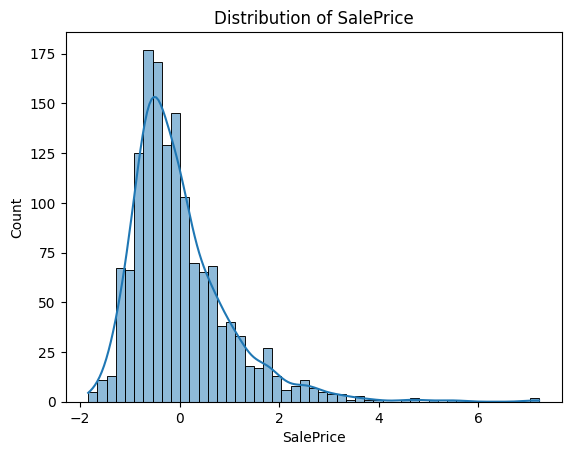

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of SalePrice")
plt.show()

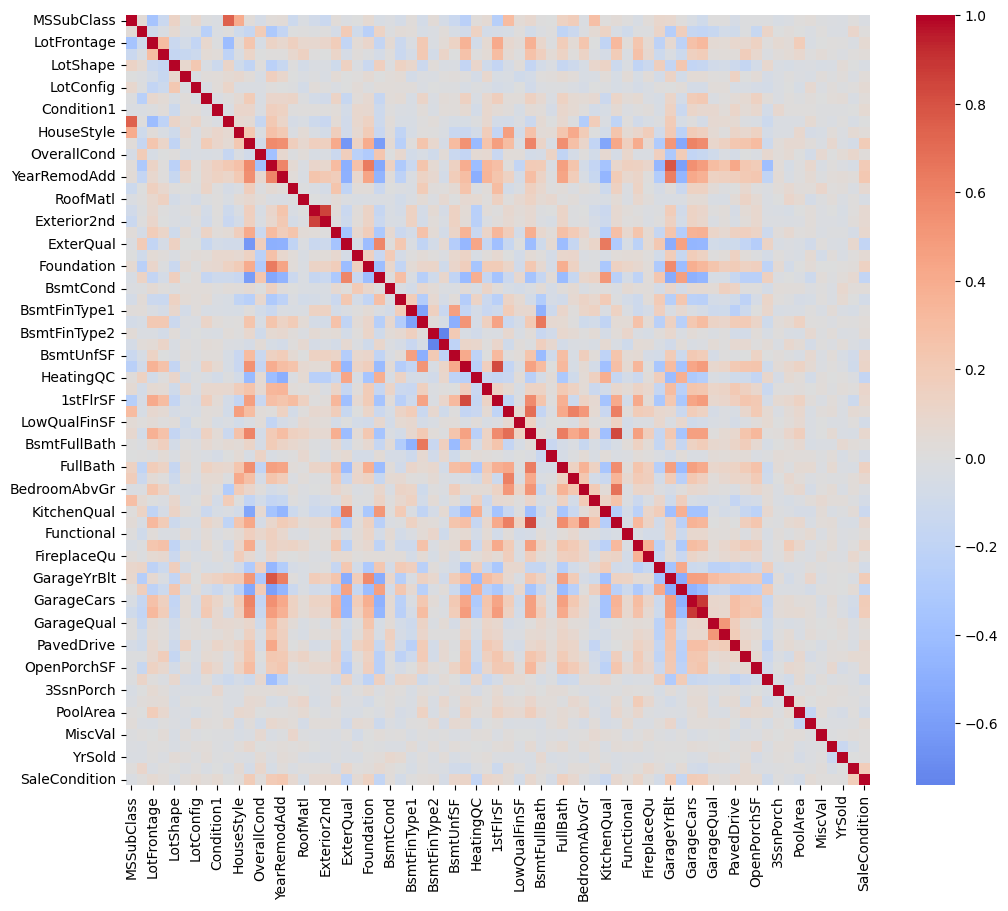

In [53]:
corr = X.corr(numeric_only=True)

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.show()

### Fit a linear regression or random forest to see actual importance:

In [70]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(X, y)
# importances = pd.Series(model.feature_importances_, index=X.columns)
# importances_sorted=importances.sort_values(ascending=False)
# print(importances_sorted)


In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
X_train.shape

(1168, 48)

In [73]:
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [74]:
y_pred = lr_model.predict(X_test)

In [75]:
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = mse ** 0.5

# R-squared score
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MSE: 0.19097801587349192
RMSE: 0.43701031552297703
R2 Score: 0.8429717409625923


In [78]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0) 
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
print("Ridge Regression")
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))


Ridge Regression
MSE: 0.19098386916151983
RMSE: 0.43701701243946994
R2 Score: 0.8429669282011629


In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)  # smaller alpha → less shrinkage
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_test)
mse=mean_squared_error(y_test, y_pred)
print("Lasso Regression")
print("MSE:", mse)
print("RMSE:", np.sqrt(mse))
print("R2 Score:", r2_score(y_test, y_pred))


Lasso Regression
MSE: 0.19109938084469857
RMSE: 0.4371491517144904
R2 Score: 0.8428719507849138


In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Example for Ridge
params = {'alpha':[0.01, 0.1, 1, 10, 50, 100]}
grid = GridSearchCV(Ridge(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best alpha for Ridge:", grid.best_params_)

# Example for Lasso
params = {'alpha':[0.0001, 0.001, 0.01, 0.1, 1]}
grid = GridSearchCV(Lasso(), param_grid=params, cv=5)
grid.fit(X_train, y_train)
print("Best alpha for Lasso:", grid.best_params_)

Best alpha for Ridge: {'alpha': 100}
Best alpha for Lasso: {'alpha': 0.01}


In [81]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Ridge with best alpha
ridge_final = Ridge(alpha=50)
ridge_final.fit(X_train, y_train)
y_pred_ridge = ridge_final.predict(X_test)

# Lasso with best alpha
lasso_final = Lasso(alpha=0.01)
lasso_final.fit(X_train, y_train)
y_pred_lasso = lasso_final.predict(X_test)

# Evaluate
def evaluate(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} -> MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}")

evaluate(y_test, y_pred_ridge, "Ridge")
evaluate(y_test, y_pred_lasso, "Lasso")


Ridge -> MSE: 0.1907, RMSE: 0.4366, R2: 0.8432
Lasso -> MSE: 0.1928, RMSE: 0.4390, R2: 0.8415


In [82]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

ridge_gs = GridSearchCV(Ridge(), param_grid, cv=5, scoring='r2')
ridge_gs.fit(X_train, y_train)

print("Best Ridge α:", ridge_gs.best_params_)
print("Best CV R2:", ridge_gs.best_score_)

Best Ridge α: {'alpha': 100}
Best CV R2: 0.8006269541936085


In [83]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize model
rf = RandomForestRegressor(
    n_estimators=200,   # number of trees
    max_depth=None,     # can tune
    random_state=42
)

# Train
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")


MSE: 0.1324
RMSE: 0.3638
R2: 0.8912


## Checking which feature is more imp for RandomForestRegressor 

In [84]:
import pandas as pd

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

          Feature  Importance
0     OverallQual    0.555954
1       GrLivArea    0.125482
6     TotalBsmtSF    0.035420
22       2ndFlrSF    0.032294
18     BsmtFinSF1    0.029517
7        1stFlrSF    0.028575
27        LotArea    0.019356
4      GarageArea    0.016976
12      YearBuilt    0.014568
2      GarageCars    0.014117
20    LotFrontage    0.010532
35   Neighborhood    0.009505
13   YearRemodAdd    0.008865
5        BsmtQual    0.008729
16    GarageYrBlt    0.007265
10   GarageFinish    0.007148
11   TotRmsAbvGrd    0.006526
23    OpenPorchSF    0.006414
9        FullBath    0.006184
33      BsmtUnfSF    0.006062
21     WoodDeckSF    0.005197
14     MasVnrArea    0.004417
15     Fireplaces    0.004153
8     KitchenQual    0.003494
45    ScreenPorch    0.003251
3       ExterQual    0.003232
24     GarageType    0.003224
34  SaleCondition    0.002668
25   BsmtExposure    0.002551
47    Exterior1st    0.001910
28       LotShape    0.001866
37   BedroomAbvGr    0.001826
38       M

In [85]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"GBR MSE: {mse:.4f}")
print(f"GBR RMSE: {rmse:.4f}")
print(f"GBR R²: {r2:.4f}")


GBR MSE: 0.1099
GBR RMSE: 0.3315
GBR R²: 0.9096


In [87]:
feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbr.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(20))

         Feature  Importance
0    OverallQual    0.539748
1      GrLivArea    0.134404
2     GarageCars    0.039383
6    TotalBsmtSF    0.036295
18    BsmtFinSF1    0.034668
22      2ndFlrSF    0.027764
7       1stFlrSF    0.022454
27       LotArea    0.018065
13  YearRemodAdd    0.014255
10  GarageFinish    0.013692
12     YearBuilt    0.012721
5       BsmtQual    0.011542
35  Neighborhood    0.008264
4     GarageArea    0.008180
15    Fireplaces    0.007597
20   LotFrontage    0.005750
16   GarageYrBlt    0.005738
23   OpenPorchSF    0.005587
3      ExterQual    0.005540
8    KitchenQual    0.005244


In [86]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor

estimators = [
    ('ridge', Ridge(alpha=100)),
    ('lasso', Lasso(alpha=0.01)),
    ('rf', RandomForestRegressor(n_estimators=200, random_state=42))
]

stack = StackingRegressor(
    estimators=estimators,
    final_estimator=GradientBoostingRegressor(n_estimators=200, random_state=42)
)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)

print("Stacking R²:", r2_score(y_test, y_pred))


Stacking R²: 0.7737623296205086


In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize model
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist', 
    eval_metric='rmse'
)

# Train
xgb.fit(X_train, y_train)

# Predict
y_pred = xgb.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MSE: {mse:.4f}")
print(f"XGBoost RMSE: {rmse:.4f}")
print(f"XGBoost R²: {r2:.4f}")


XGBoost MSE: 0.1046
XGBoost RMSE: 0.3233
XGBoost R²: 0.9140


| Model             | MSE        | RMSE       | R²         |
| ----------------- | ---------- | ---------- | ---------- |
| Ridge (α=100)     | 0.1907     | 0.4366     | 0.8432     |
| Lasso             | 0.1928     | 0.4390     | 0.8415     |
| Random Forest     | 0.1324     | 0.3638     | 0.8912     |
| Gradient Boosting | 0.1099     | 0.3315     | 0.9096     |
| **XGBoost**       | **0.1046** | **0.3233** | **0.9140** |


In [89]:
import pandas as pd

feat_imp = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(20))

         Feature  Importance
0    OverallQual    0.292513
2     GarageCars    0.175561
9       FullBath    0.047057
1      GrLivArea    0.044931
8    KitchenQual    0.038612
10  GarageFinish    0.035073
15    Fireplaces    0.032067
5       BsmtQual    0.031909
22      2ndFlrSF    0.023860
18    BsmtFinSF1    0.023502
6    TotalBsmtSF    0.019473
3      ExterQual    0.017842
7       1stFlrSF    0.016601
39  KitchenAbvGr    0.015925
24    GarageType    0.014878
27       LotArea    0.011566
13  YearRemodAdd    0.011291
11  TotRmsAbvGrd    0.011284
12     YearBuilt    0.010240
28      LotShape    0.008899


### XGBoost by reducing features

Final Optimized XGBoost Metrics:
MSE: 0.1169
RMSE: 0.3419
R²: 0.9039

Top Feature Importances:
         Feature  Importance
0    OverallQual    0.288695
1     GarageCars    0.191446
11     ExterQual    0.141291
3      GrLivArea    0.052152
5   GarageFinish    0.041372
4    KitchenQual    0.040625
8       2ndFlrSF    0.031630
7       BsmtQual    0.026407
9     BsmtFinSF1    0.024380
6     Fireplaces    0.021158
12      1stFlrSF    0.019777
2       FullBath    0.019148
13  KitchenAbvGr    0.018934
10   TotalBsmtSF    0.017546
18     YearBuilt    0.015856
16  YearRemodAdd    0.014829
15       LotArea    0.013087
14    GarageType    0.010868
17  TotRmsAbvGrd    0.010799


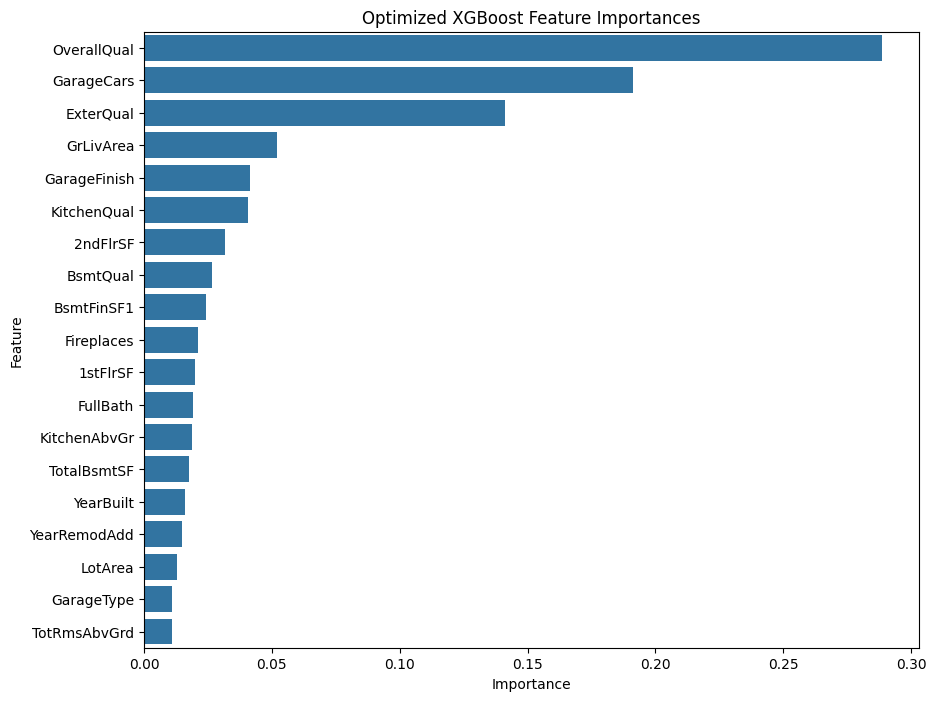

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming feat_imp is the DataFrame with 'Feature' and 'Importance' from previous XGBoost run
top_features = feat_imp[feat_imp['Importance'] > 0.01]['Feature'].tolist()
X_top = X[top_features]

X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)


xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    tree_method='hist', 
    eval_metric='rmse'
)

xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Final Optimized XGBoost Metrics:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")


feat_importances = pd.DataFrame({
    'Feature': X_top.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop Feature Importances:")
print(feat_importances)

plt.figure(figsize=(10,8))
sns.barplot(x='Importance', y='Feature', data=feat_importances)
plt.title("Optimized XGBoost Feature Importances")
plt.show()
